# (Ford GoBike: Exploration Notebook)
## By: Mohamed Korain

## Preliminary Wrangling

> This data set contains information about bicycle rides made in the greater San Francisco Bay area using a bike-sharing system. Our aim is to check the dataset, its features and explore the relationship between them.

In [411]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data Exploration/ Wrangling:

In [412]:
# Loading our dataset:

df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head() #displaying the first 5 rows of the dataset.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [413]:
print('The number of rows we have in our dataset is:', df.shape[0],
      '.However the number of columns is:', df.shape[1])

The number of rows we have in our dataset is: 183412 .However the number of columns is: 16


After loading our dataset, We will have a deeper look into the details of it, try to notice any kind of patterns or insights and also to understand its structcure and main features.

In [414]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [415]:
# Checking for duplicates:

print('The number of duplicate records we have in the dataset is',df.duplicated().sum())

The number of duplicate records we have in the dataset is 0


In [416]:
# Checking for any null values in our dataset:

df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

As we can see the above output, We have 6 columns which have null values which are (start_station_id, start_station_name,end_station_id, member_birth_year,  end_station_name In the next cells,member_gender). The maximum number of null values we have is 8265 values so I feel that the best approach here is to drop them as it does not exceed 5% of the total records of the dataset.

In [417]:
# Dropping null values:

df.dropna(inplace=True)
df.info() # Checking all columns after the drop of the null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

I will do some adjustments in the data just to make the data we have more user friendly. 
First, We will change the duration_sec to duartion minutes:
    

In [418]:
df['duration_min'] = df['duration_sec'] / 60
df['duration_min'] = df['duration_min'].astype(int)

# Dropping the old duration_sec column:

df.drop(columns='duration_sec', inplace=True)


Also, as we already have the customers birth year, we can caclulate the age of every user who rented a bike:

In [419]:
# Calculating members age:

df['member_age'] = 2019 - df['member_birth_year']

# Changing type to int

df['member_age'] = df['member_age'].astype(int)

# Dropping the member_birth_year column: 

df.drop(columns='member_birth_year', inplace=True)


In [420]:
df['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

As we explore the member_age column more, we notice that the max year from the column description summary is 141 years. We continue checking for more out-of-range values and drop the ages which exceeds 100:

In [421]:
# Check how many values for ages more than 100:

abnormal_ages = df[df['member_age'] > 100]
print('The no abnormal ages in the dataset are:', abnormal_ages.shape[0])



The no abnormal ages in the dataset are: 72


We have 72 entries which have ages more than 100. So I prefer to drop those records as follows:

In [422]:
# Dropping ages which is bigger than 100:

df = df[df['member_age'] < 100]


We will then transform the dates we have of start time and end time to adequate format:

In [423]:
# Transforming start_date:

df['start_time'] = pd.to_datetime(df['start_time'])

# Transforming end_time:

df['end_time'] = pd.to_datetime(df['end_time'])


We will split the columns of start time to minutes, hour,day and month to be able to generate more insights and have detailed info:

In [424]:
# Getting hour from start time

df['start_hour'] = df['start_time'].dt.strftime('%H')

# Getting day from start time

df['start_day'] = df['start_time'].dt.strftime('%A')

# Getting month from start time

df['start_month'] = df['start_time'].dt.strftime('%B')

In [425]:
df.start_month.unique()


array(['February'], dtype=object)

All of our trips are recorded in Febraury 2019.

df.head()

In [426]:
# Checking user types:

df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [427]:
# Checking stations:

print('We have', df.start_station_name.nunique(), 'stations recorded in the dataset.')

We have 329 stations recorded in the dataset.


In [428]:
# Dataset shape after Features engineering and data wrangling:

df.shape

(174880, 19)

In [444]:
# Exporting df to csv:

df.to_csv(r'C:\Users\koraim\OneDrive - Dell Technologies\Desktop\Data Science\Udacity\Project 3\Submission\cleaned_FordGoBike.csv', index=False,
          header=True)

### What is the structure of the dataset?

> The dataset consists of 19 columns and 174880 records after data wranngling.

### What is/are the main feature(s) of interest in the dataset?

> The duration_min, member age and also start time are the main features of the dataset.

### What features will help support your investigation into your feature(s) of interest?

> Start(hour, day, month) will support the analysis of the dataset.

## Univariate Exploration

> In this section, We investigate distributions of individual variables and try to get the  relationships between variables.

I will start with exploration of the main features we mentioned above as we want to learn more about the passengers and how the trips change through time.Firstly, I will start with start_time features( Hour, Day and Month):

#### Which hour of the day that has most corresponding trips?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


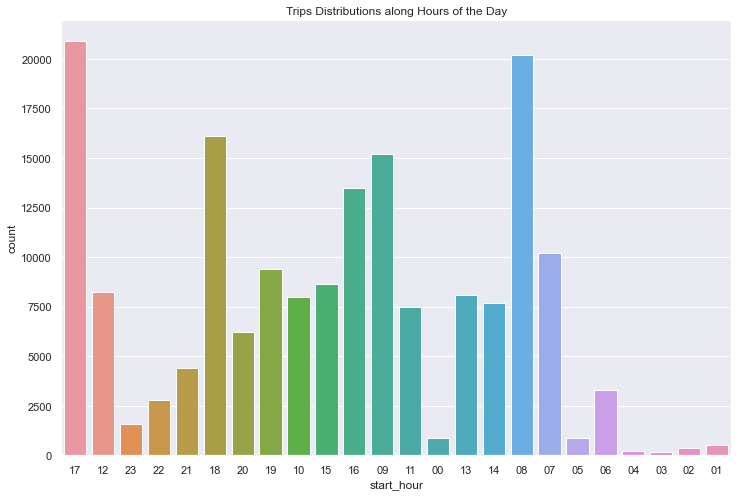

In [429]:
# Exploring Hours of the day and its trips distribution:


sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title('Trips Distributions along Hours of the Day')
sb.countplot(df.start_hour);

**Conclusion**: 17 and 08 hours are the most significant times of the day when it comes to bike rentals whith excess of 20,000 trips.

### Which weekday has the most trips?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


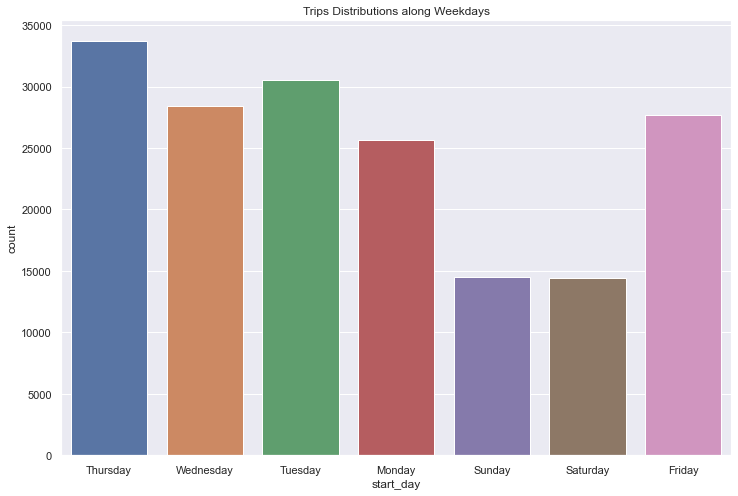

In [430]:
# Exploring most weekdays with bike rentals:

sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title('Trips Distributions along Weekdays')
sb.countplot(df.start_day);

**Conclusion**: Thursday is the most day of the week with rentals followed by Tuesday.

We already know that all of the trips are recorded in **Febraury** so no need to plot the months. We will now switch to passengers age:

### Which age groups has the most members?

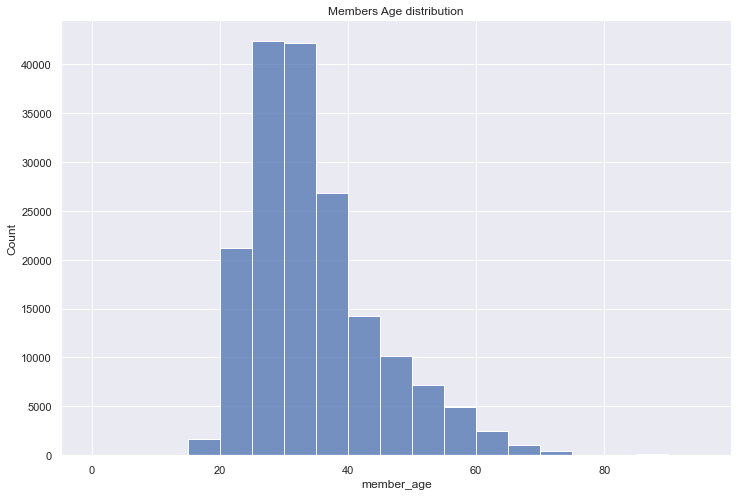

In [431]:
# Exploring the age:

bins = np.arange(0, df['member_age'].max(), 5)

sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title('Members Age distribution')
sb.histplot(df['member_age'], bins=bins);


**Conclusion**: That's a little bit skewed to the right distribution as it shows age groups from 20 to 40 as leading for renting bike trips.

### Which trip duration range has the most occurance?

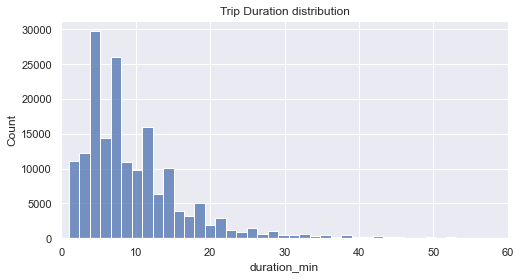

In [432]:
# Plotting Duration:
sb.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
plt.xlim(0,60)
plt.title('Trip Duration distribution')
sb.histplot(df['duration_min'], bins=1000);

In [433]:
# Exploring the Gender of the users:

#plt.pie(df.member_gender)


**Conclusion**: Most of the trips have duration less than 10 minutes as we can see from the graph above.

### What is the main group of the users? Customers or Subscribers?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


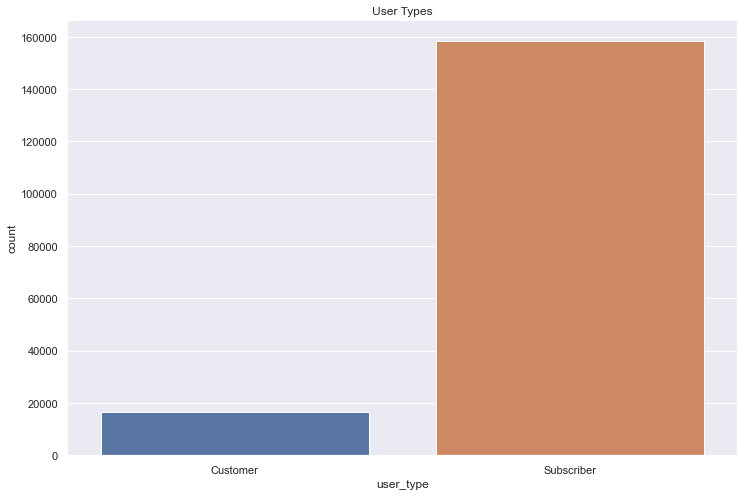

In [434]:
# Exploring user types:


sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title('User Types')
sb.countplot(df.user_type);

**Conclusion**: Around 90% of the users are subscribers.

### Were there any unusual points?

> There was some unusal values of the members age as we had 70+ values which are larger than 100. We deduced that those values were inserted by mistake and removed them in the data wrangling phase.


###  Were there any unusual distributions? Were there any operations on the data to tidy, adjust, or change the form of the data? If so, why?

- I feel like its a bit unusual to have most of the trips have durations under 10 minutes. I mean its not in a problem in the data itself but surely the customers/ subscribers use the bike rentals more often.
- We created more features from the data data to have more insights of which hour/day are the most when it comes to bike rentals.

## Bivariate Exploration

> In this section, We investigate relationships between pairs of variables in your
our dataset. As we already mentioned that our most important features are the dates of the trips and the duration as well, We will examine those features with other data from the dataset to produce more insights:

### Which day of the week has the most average trips duration?

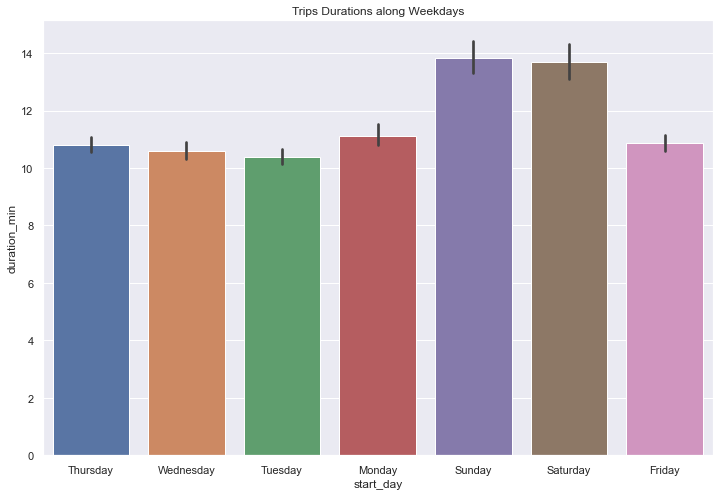

In [435]:
# Exploring trips duration against days of the week:


sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title('Trips Durations along Weekdays')
sb.barplot(data=df, x= 'start_day', y='duration_min');

**Conclusion**: Sundays and Saturdays have the largest average of trip duration which makes some sense as people tend to maybe rent/ride bikes at the weekends.

### What is the average trip duration for the age groups we have in the dataset?

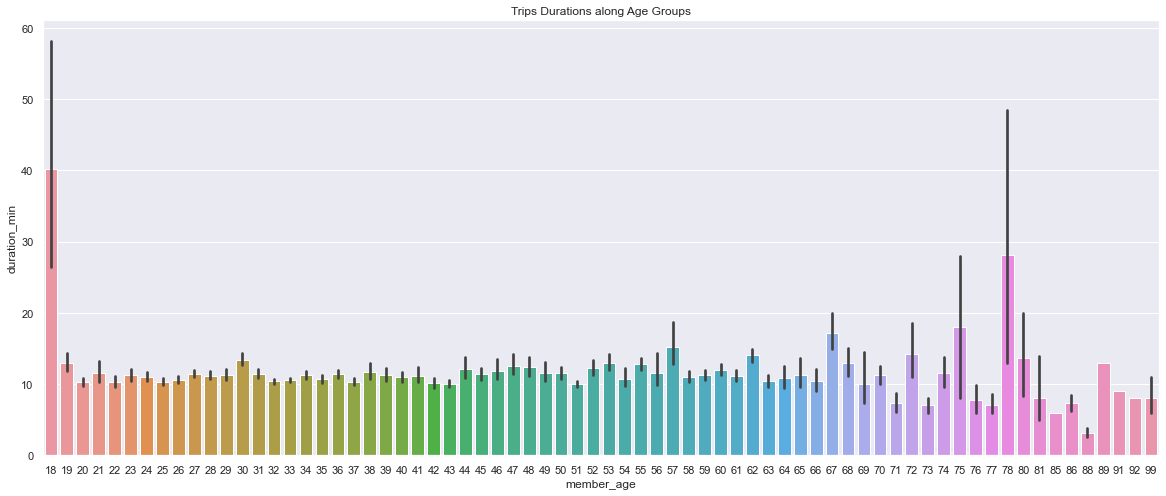

In [436]:
# Exploring trips duration against Age Groups:

sb.set_theme(style='darkgrid')
plt.figure(figsize=(20,8))
plt.title('Trips Durations along Age Groups')
sb.barplot(data=df, x= 'member_age', y='duration_min');


**Conclusion**: The most age groups with largest average of trip duration are 18 and 78

### What are the user count from the different genders?

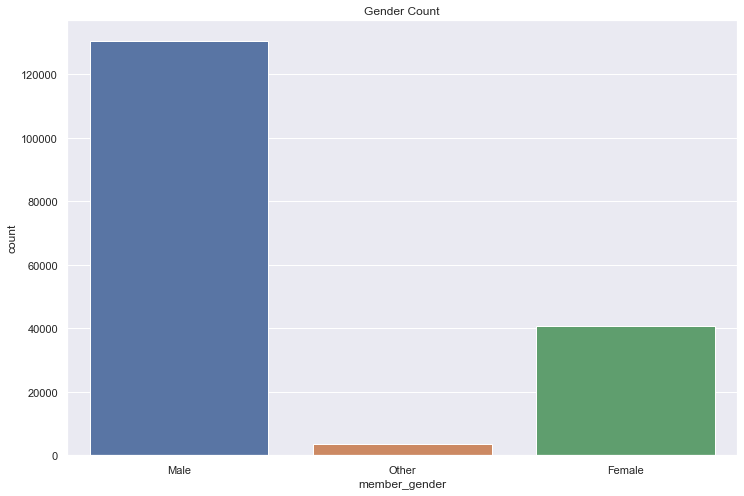

In [437]:
sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Gender Count")
sb.countplot(x=df.member_gender);

**Conclusion**: Majority of the users are males.

### What is the age range of the different user types?

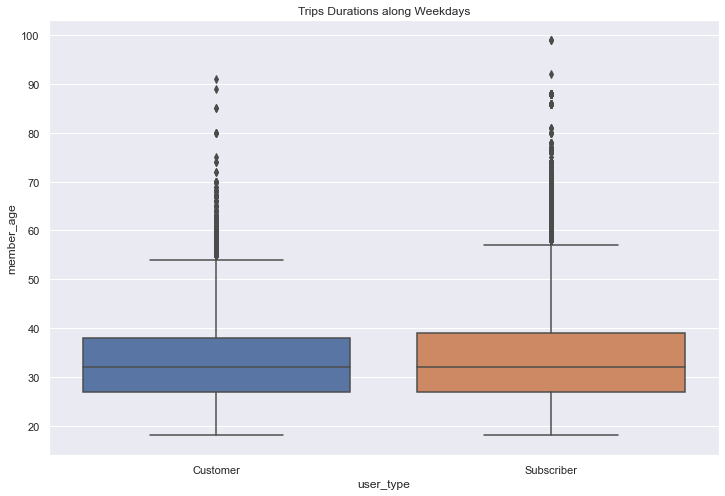

In [438]:
sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title('Trips Durations along Weekdays')
sb.boxplot(data=df, x= 'user_type', y='member_age');

**Conclusion**: It seems that Subscribers have larger range of age however Customers have slightly younger age range.

### What is age range of the different genders?

<AxesSubplot:title={'center':'Age against Gender relationsip'}, xlabel='member_gender', ylabel='member_age'>

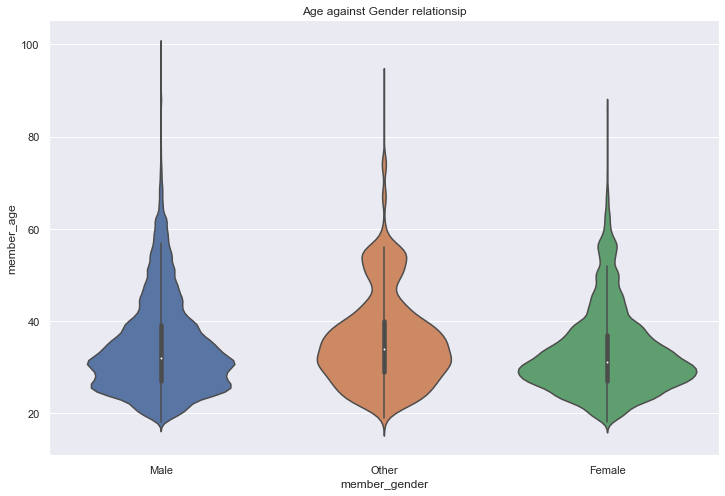

In [439]:
#Exploring Age and Gender

sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title('Age against Gender relationsip')
sb.violinplot(x=df.member_gender, y= df.member_age)

**Conclusion**: Both Male and Females age ranges have the same age median.

### What are the most popular stations used by Customers/ Subscribers to rent bikes?

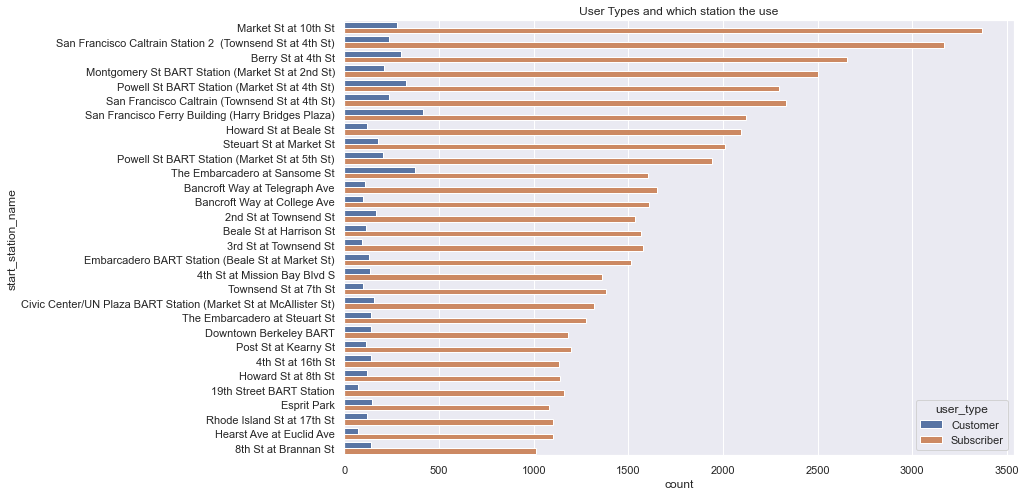

In [440]:
# Plotting User types and the relationship with the start station of the trip:

top_stations = df.start_station_name.value_counts().head(30).index
sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title('User Types and which station the use')
sb.countplot(y=df.start_station_name, hue=df.user_type, order=top_stations);

**Conclusion**: Market St and San Francisco Caltrain Station 2 are the two most stations used by Subscribers to rent bikes. On the other hand, San Francisco Ferry Building and The Embarcader are the most stations used by Customers.

###  How did the feature(s) of interest vary with other features in the dataset?

- The median of both genders (Male/Female) is nearly identical.
- Sundays have the most average trips duration which is logical as people tend to use bikes at the weekends.

### Were there any interesting relationships between the other features (not the main feature(s) of interest)?

- The age groups with most average trips are 18 and 78(!)
- There is a huge gap between the number of Subscribers and Customers for the top used start stations.


## Multivariate Exploration

> Creating plots of three or more variables to investigate your data even
further:

### What is the relationship between Weekdays, Average duration and the User Gender?

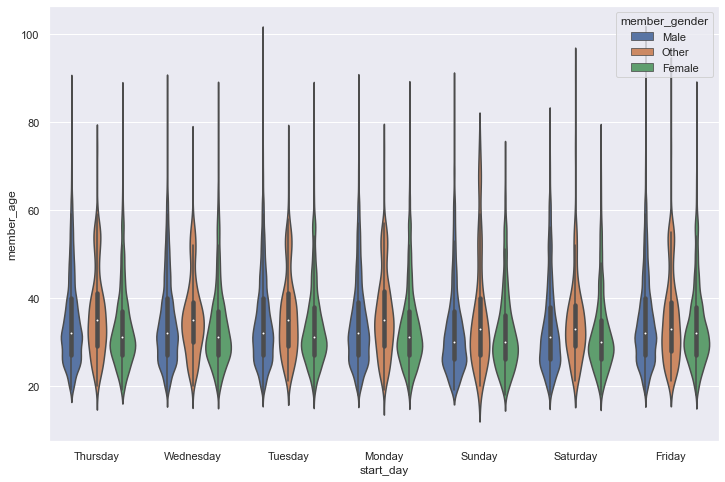

In [441]:
sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
sb.violinplot(x=df.start_day, y= df.member_age, hue=df.member_gender);

**Conclusion**: "Other" gender have the largest median of ages on Tuesdays.
    

### Which gender have most average trip duration among weekdays?

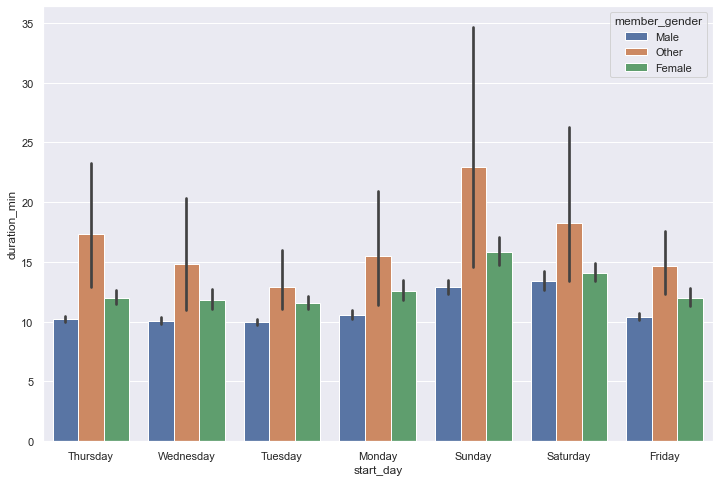

In [442]:
sb.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
sb.barplot(x=df.start_day, y= df.duration_min, hue=df.member_gender);

**Conclusion**: 'Other' gender is has the most average trip duration on Sundays.

### Were there features that strengthened each other?

> 'Other' gender users seem to be more active than Males/Females along the Weekdays. Also, Sundays comes first if we search for active days among the three genders. So we can say that member_gender strengthed the start_day feature.


## Summary:

- Renting a bike is very popular among subscribers rather than customers which may point to special rates or free rides for subscribed users.
- Short trips for both subscribers and customers are favored which show how much they are convenient and beneficial for commuting around the city.
- The 'Other' gender seems to be much more active along weekdays although most of our users are of male gender.
- Sunday is the most active day among the three genders we have.
- Market St and San Francisco Caltrain Station 2 are the two most stations used by Subscribers to rent bikes.